In [1]:
import pandas as pd

import plotnine
from plotnine import *

dpi=300

In [2]:
df=pd.read_csv('../data/Fig4D.csv', index_col=0)
df['Celltype']=[c + '_healthy' for c in df['Celltype'].values]
df

,Background,Celltype,value,cell_state_dendrogram_index,Percentage_roi_thresMean
15,Control,EP.AT2_healthy,1.772819,8,0.769231
16,PRES,EP.AT2_healthy,-0.605972,8,0.142857
17,EDAD,EP.AT2_healthy,-0.536725,8,0.129630
18,MDAD,EP.AT2_healthy,-0.355752,8,0.166667
19,ODAD,EP.AT2_healthy,-0.274370,8,0.211538
20,Control,EP.AT1_healthy,1.785767,22,0.769231
21,PRES,EP.AT1_healthy,-0.524973,22,0.047619
22,EDAD,EP.AT1_healthy,-0.364587,22,0.212963
23,MDAD,EP.AT1_healthy,-0.426617,22,0.125000
24,ODAD,EP.AT1_healthy,-0.469589,22,0.096154


In [3]:
manual_cell_order=[
    'EP.AT1_healthy', 'EP.AT2_healthy',  'EP.Secretory_healthy'
]

order_of_pathology=['Control', 'PRES', 'EDAD', 'MDAD', 'ODAD'][::-1]

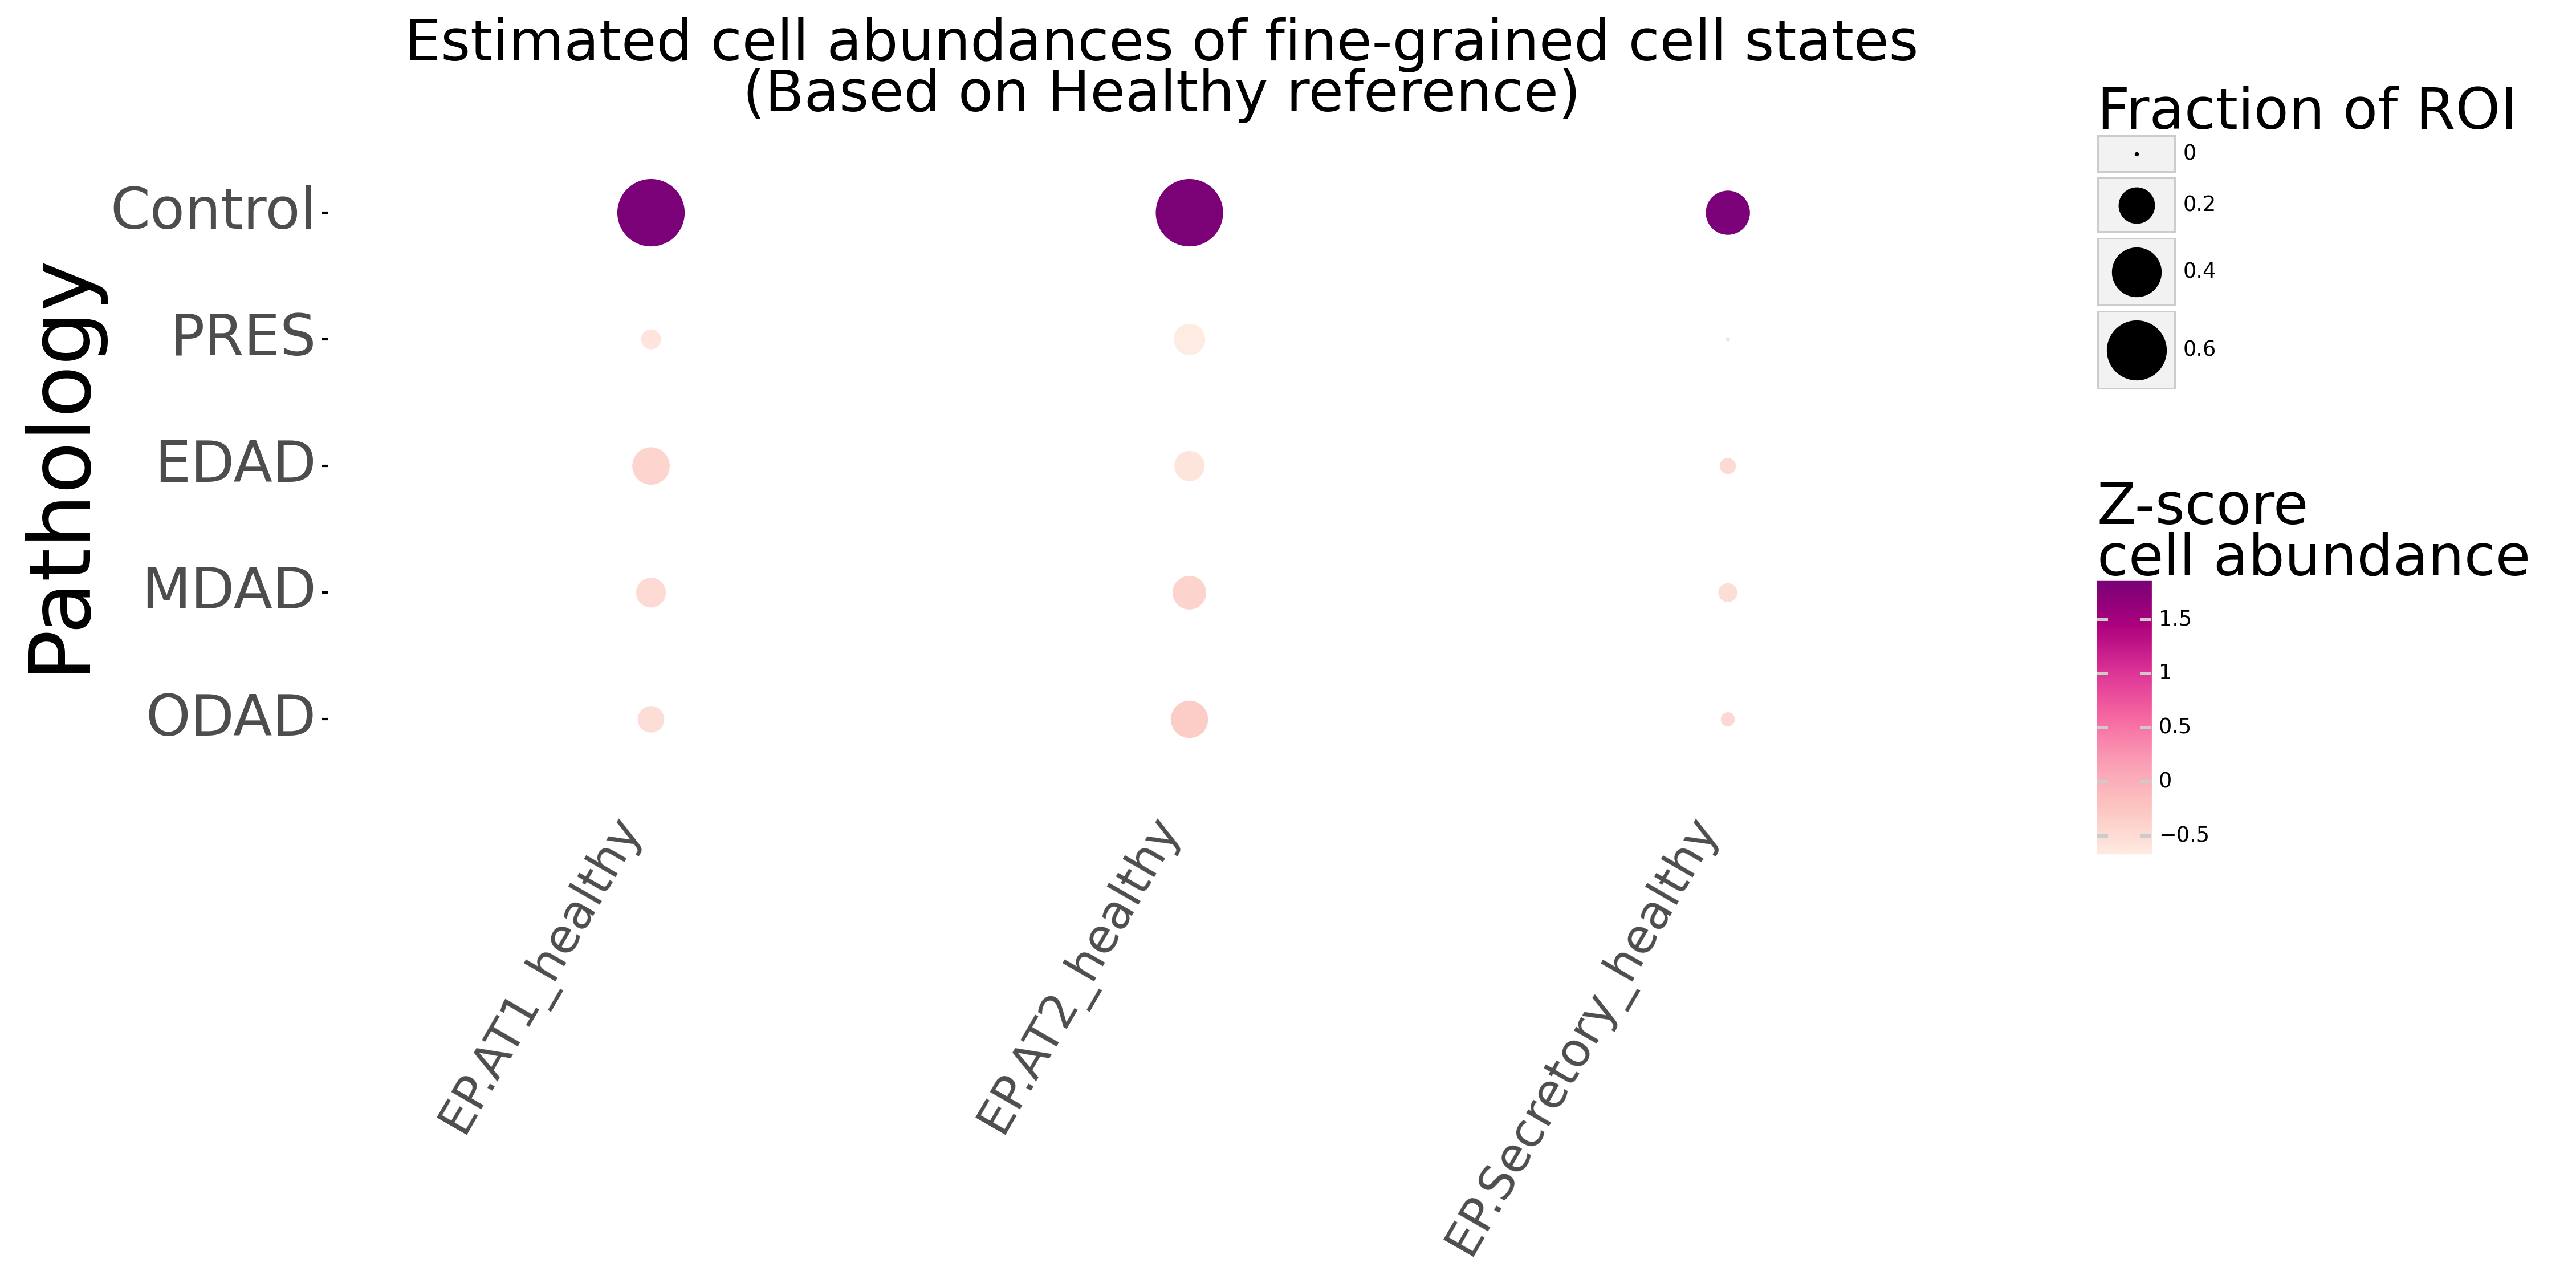

<ggplot: (8770625183481)>

In [4]:
p1=(
    ggplot()
    + geom_point(
        data=df[[c in manual_cell_order for c in df['Celltype']]], 
        mapping=aes(
            x='Celltype', 
            y='Background', 
            fill='value', 
            colour='value',
            size='Percentage_roi_thresMean'
        )
    )
    + theme_bw()
    + theme(
        axis_text_x=element_text(angle=60, vjust=1, hjust=1, size=20), 
        axis_text_y=element_text(size=24),
        axis_title=element_text(size=36), 
        axis_ticks_major_x=element_blank(),
        title=element_text(size=24),
        panel_grid_major=element_blank(),
        panel_border=element_blank(),
        panel_spacing_x=.5,
        panel_spacing_y=.2,
        figure_size=(13,5), 
        dpi=dpi,
        legend_position='right' 
    ) 
    + scale_size_continuous(range=[0,15]) 
    + scale_fill_distiller(palette='RdPu', direction=1) 
    + scale_colour_distiller(palette='RdPu', direction=1) 
    + scale_x_discrete(limits=manual_cell_order ) 
    + scale_y_discrete(limits=order_of_pathology) 
    + labs(
        x='', 
        y='Pathology', 
        title='Estimated cell abundances of fine-grained cell states\n(Based on Healthy reference)',
        size='Fraction of ROI', 
        fill='Z-score\ncell abundance\n', 
        colour='Z-score\ncell abundance\n'
    )
)

# ggsave(p1, 'Fig4D.svg', format='svg')

p1